In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import random
import math
import itertools
import pandas as pd
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

# Función para convertir un vector fila a vector columna.
def columna(vector):
    return np.array(np.matrix(vector)).T

# a) Separar los datos

Del conjunto total de imágenes, saque sólo las imágenes con sus landmarks de la emoción felicidad. Este sería el conjunto de la clase 1, y sea Nh el tamaño de este conjunto. Ahora, del resto de imágenes de todas las otras emociones, saque un subconjunto de tamaño Nh de tal manera que el número de muestras de cada emoción esté lo más balanceado posible. Es decir, la cantidad de imágenes de expresiones neutrales, tristes, furiosas, disgustadas, y miedosas cada una debe ser lo más aproximado a Nh/5. Este conjunto sería el conjunto de la clase 0.

In [2]:
# Se declara el directorio donde están guardados los datos de los landmarks.
dataDir = "Faces/markings/"
data = []
# Se carga cada archivo y se guarda en la lista llamada data.
for file in os.listdir(dataDir) :
    data.append(scipy.io.loadmat(dataDir+file))

In [3]:
# clase1 -> happy
# clase0 -> subconjunto de tamaño len(clase1) sacado del conjunto que queda después de quitar los datos happy del conjunto total de datos

clase1 = []
indicesclase1 = []

# En esta lista habrá 803 datos. De estos 803 datos vamos a sacar solo 171, al azar y que queden equitativamente distribuidos entre expersiones faciales.
notclase1 = []
indicesnotclase1 = []

# Recorremos los archivos y clasificamos cada uno por su respectiva expersión facial. Adicionalmente, guardamos sus resepctivos índices dentro de la lista de archivos.
for file in os.listdir(dataDir):
    if (file[8] == "n"):
        notclase1.append(file)
        indicesnotclase1.append(os.listdir(dataDir).index(file))
    elif (file[8] == "h"):   
        clase1.append(file)
        indicesclase1.append(os.listdir(dataDir).index(file))
    elif (file[8] == "s"):
        notclase1.append(file)
        indicesnotclase1.append(os.listdir(dataDir).index(file))
    elif (file[8] == "f"):
        notclase1.append(file)
        indicesnotclase1.append(os.listdir(dataDir).index(file))
    elif (file[8] == "a"):
        notclase1.append(file) 
        indicesnotclase1.append(os.listdir(dataDir).index(file))
    elif (file[8] == "d"):
        notclase1.append(file)
        indicesnotclase1.append(os.listdir(dataDir).index(file))
     

In [4]:
# Creamos una lista de listas, para poderlas recorrer.
listas = [clase1, notclase1]

# Imprimimos la longitud de cada una de las listas recientemente creadas.
for lista in listas:
    if (lista == clase1):
        print(f'Clase 1 (happy): {len(lista)} elementos')
    elif (lista == notclase1):
        print(f'Not Clase 1: {len(lista)} elementos')

print(f'Total: {len(clase1) + len(notclase1)} elementos')

Clase 1 (happy): 171 elementos
Not Clase 1: 803 elementos
Total: 974 elementos


In [5]:
# Creamos listas para guardar los strings de los archivos que corresponden a cada expresión facial, con su correspondiente lista para saber los índices donde se encuentran esas expresiones faciales dentro de la lista 'notclase1'.

neutral = []
indicesneutral = []

sad = []
indicessad = []

fear = []
indicesfear = []

angry = []
indicesangry = []

disgust = []
indicesdisgust = []

# Hallamos los índices donde se encuentra cada expresión facial dentro de la lista 'notclase1'.
for file in notclase1:
    if (file[8] == "n"):
        neutral.append(file)
        indicesneutral.append(notclase1.index(file))
    elif (file[8] == "s"):
        sad.append(file)
        indicessad.append(notclase1.index(file))
    elif (file[8] == "f"):
        fear.append(file)
        indicesfear.append(notclase1.index(file))
    elif (file[8] == "a"):
        angry.append(file) 
        indicesangry.append(notclase1.index(file))
    elif (file[8] == "d"):
        disgust.append(file)
        indicesdisgust.append(notclase1.index(file))

# Creamos listas para cada expresión facial donde van a ir los datos (landmarks) en sí de cada expresión facial. 
datosNeutral = []
datosSad = []
datosFear = []
datosAngry = []
datosDisgust = []

# Llenamos dichas listas para guardar los datos de cada expresión facial.
for indice in indicesneutral:
    datosNeutral.append(data[indice]['faceCoordinatesUnwarped'])

for indice in indicessad:
    datosSad.append(data[indice]['faceCoordinatesUnwarped'])

for indice in indicesfear:
    datosFear.append(data[indice]['faceCoordinatesUnwarped'])

for indice in indicesangry:
    datosAngry.append(data[indice]['faceCoordinatesUnwarped'])

for indice in indicesdisgust:
    datosDisgust.append(data[indice]['faceCoordinatesUnwarped'])

# Creamos una lista para guardar los datos de la Clase 1.
datosClase1 = []

# Llenamos la lista con los datos de clase 1
for indice in indicesclase1:
    datosClase1.append(data[indice]['faceCoordinatesUnwarped'])

# Creamos una lista para gaurdar los datos de la Clase 0.
datosClase0 = []

# Elegimos datos de cada expresión facial aleatoriamente para llenar la Clase 0. Los k elegidos garantizan que se eligan datos de cada expresión facial de forma equitativa.
neutral_in_clase0 = random.sample(datosNeutral, k=35)
sad_in_clase0 = random.sample(datosSad, k=35)
fear_in_clase0 = random.sample(datosFear, k=34)
angry_in_clase0 = random.sample(datosAngry, k=34)
disgust_in_clase0 = random.sample(datosDisgust, k=33)

# Se agregan los datos a la lista.
datosClase0.append(neutral_in_clase0)
datosClase0.append(sad_in_clase0)
datosClase0.append(fear_in_clase0)
datosClase0.append(angry_in_clase0)
datosClase0.append(disgust_in_clase0)

# Esta línea es para que nos quede una lista con todos los datos, no una lista de 5 listas.
datosClase0 = list(itertools.chain.from_iterable(datosClase0))

print(f'\nCantidad de datos en la Clase 1: {len(datosClase1)}\n')
print(f'Cantidad de datos en la Clase 0: {len(datosClase0)}\n')


Cantidad de datos en la Clase 1: 171

Cantidad de datos en la Clase 0: 171



# b) Crear listas de entrenamiento y validación por clase

In [6]:
# Se determinan los números de datos que debe haber en cada conjunto de entrenamiento y validación.
numTraining1 = math.ceil(0.8*len(datosClase1))
numValid1 = math.floor(0.2*len(datosClase1))  

print(f'Cantidad de datos de entrenamiento de la clase 1: {numTraining1} \n')
print(f'Cantidad de datos de validación de la clase 1: {numValid1} \n')

numTraining0 = math.ceil(0.8*len(datosClase0))
numValid0 = math.floor(0.2*len(datosClase0)) 

print(f'Cantidad de datos de entrenamiento de la clase 0: {numTraining0} \n')
print(f'Cantidad de datos de validación de la clase 0: {numValid0} \n')

# Vamos a separar los datos de cada clase en conjuntos de entrenamiento (80%) y validación (20%), es decir, vamos a tener 2 listas de entrenamiento y 2 listas de validación, una de cada clase.

# Creamos las listas donde guardaremos los datos de entrenamiento y validación para cada clase
training1 = []
validation1 = []

training0 = []
validation0 = []


Cantidad de datos de entrenamiento de la clase 1: 137 

Cantidad de datos de validación de la clase 1: 34 

Cantidad de datos de entrenamiento de la clase 0: 137 

Cantidad de datos de validación de la clase 0: 34 



Vamos a llenar las listas de datos de entrenamiento para cada clase:

In [7]:
# Sacamos k datos de la Clase 1 aleatoriamente para agregarlos a los datos de entrenamiento de la clase 1.
randomClase1 = random.sample(datosClase1, k=numTraining1)
training1.append(randomClase1)

# Lista para guardar los índices de los datos de Clase 1 obtenidos aleatoriamente 
inClase1 = []

# Obtenemos los índices de los elementos aleatorios que acabamos de generar (dentro de la lista datosClase1).
for i in range(len(datosClase1)):
    dato = datosClase1[i]
    for j in range(len(randomClase1)):
        comparison = (dato == randomClase1[j])
        equal_arrays = comparison.all()
        if equal_arrays == True:
            inClase1.append(i)

# Creamos una lista nueva que no incluye los datos cuyos índices tocaba borrar.
clase1_sin_training = [i for j, i in enumerate(datosClase1) if j not in inClase1]

##########################################################################################

# Hacemos lo mismo, pero ahora con la clase 0.
randomClase0 = random.sample(datosClase0, k=numTraining0)
training0.append(randomClase0)

# Lista para guardar los índices de los datos de Clase 0 obtenidos aleatoriamente 
inClase0 = []

# Obtenemos los índices de los elementos aleatorios que acabamos de generar (dentro de la lista datosClase0).
for i in range(len(datosClase0)):
    dato = datosClase0[i]
    for j in range(len(randomClase0)):
        comparison = (dato == randomClase0[j])
        equal_arrays = comparison.all()
        if equal_arrays == True:
            inClase0.append(i)

# Creamos una lista nueva que no incluye los datos cuyos índices tocaba borrar.
clase0_sin_training = [i for j, i in enumerate(datosClase0) if j not in inClase0]

# Estas líneas son para que no nos quede una lista de 2 listas, sino solo una lista con todos los datos.
training1 = list(itertools.chain.from_iterable(training1))
training0 = list(itertools.chain.from_iterable(training0))

Ahora vamos a llenar las listas de validación de cada clase

In [8]:
# Sacamos datos de Clase 1 aleatoriamente para agregarlos a los datos de validación.
randomClase1_v = random.sample(clase1_sin_training, k=numValid1)
validation1.append(randomClase1_v)

##########################################################################################

# Sacamos datos de Clase 0 aleatoriamente para agregarlos a los datos de validación.
randomClase0_v = random.sample(clase0_sin_training, k=numValid0)
validation0.append(randomClase0_v)

# Estas líneas son para que no nos quede una lista de 2 listas, sino solo una lista con todos los datos.
validation1 = list(itertools.chain.from_iterable(validation1))
validation0 = list(itertools.chain.from_iterable(validation0))

# c) Media de Procrustes

Con sólo los datos de entrenamiento de ambas clases, calcule la media de Procrustes de los landmarks. Es una media de Procrustes para todos los datos de entrenamiento, y no una media para cada clase. Utilizando esta media de Procrustes, alinee los landmarks en las particiones de entrenamiento y validación. Este paso sería el de preprocesamiento (es decir, no hay necesidad de estandarizar los datos).


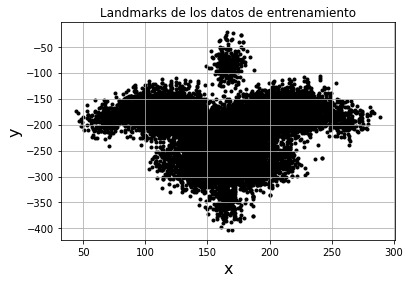

In [9]:
# Vamos a usar solamente los datos de entrenamiento de ambas clases para calcular la media de Procrustes. Es decir, vamos a crear una lista global de datos de entrenamiento.

training = [training1, training0]
training = list(itertools.chain.from_iterable(training))

# Graficamos los datos de entrenamiento.
plt.figure()
plt.grid()
for i in range(len(training)):
    plt.scatter(training[i][:,0], -training[i][:,1], color='black', marker='.')
plt.title('Landmarks de los datos de entrenamiento')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)


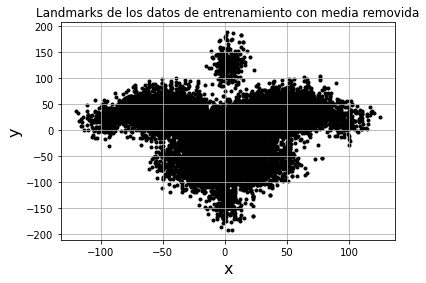

In [10]:
# Se remueve la media de cada forma

# Se concatenan todos los datos de entrenamiento para que queden todos en una sola matriz de 67*len(training) x 2
train = np.vstack(training)

# Parte real de los datos (coordsX)
wr = columna(train[:,0])

# Parte imaginaria de los datos (coordsY)
wi = columna(train[:,1])

# Se obtiene la media de cada coordenada, para luego removerla.
mediaWr = float(sum(wr))/len(wr)
mediaWi = float(sum(wi))/len(wi)

wr_sinmedia = wr - mediaWr
wi_sinmedia = wi - mediaWi

# Graficamos los landmarks con la media removida (de la clase 1).
plt.figure()
plt.grid()
plt.scatter(wr_sinmedia, -wi_sinmedia, color='black', marker='.')
plt.title('Landmarks de los datos de entrenamiento con media removida')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16))

In [11]:
# Ahora vamos a encontrar la media de Procrustes para todos los datos de entrenamiento.

# Matriz S
S = np.zeros((len(training[0]), len(training[0])))
# Se genera un vector que incluye la información de coordsX y coordsY como un vector de componentes complejas.
w_complejo = np.zeros((len(training[0]), 1), dtype=complex)

# Construimos la matriz S
primero = 1
for i in range(len(training)):
    dato = training[i]
    for j in range(len(dato)):
        w_complejo[j] = complex(dato[j][0], dato[j][1])
    if primero==1:
        S = w_complejo@np.transpose(np.conj(w_complejo))
        primero = 0
    else:
        S = S + w_complejo@np.transpose(np.conj(w_complejo))

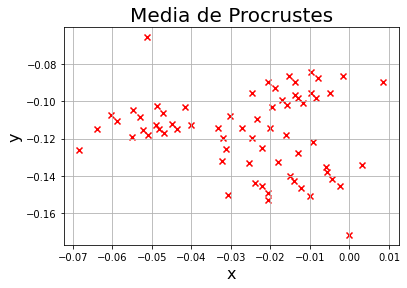

In [12]:
from numpy import linalg as LA

# Vamos a hallar la media de Procrustes

# w es un arreglo con los valores propios
# v es una matriz cuyas columnas son los vectores propios
# el valor propio en w[i] está asociado a la columna v[:,i]
w, v = LA.eig(S)

# Encontramos el índice dentro de la matriz v en donde se encuentra el vector propio asociado al mayor valor propio.
maximo = np.abs(np.amax(w))
indice = 0

for i in range(len(w)):
    if np.abs(w[i]) == maximo:
        indice = i

# Media de Procrustes
mediaProc = v[:, indice]
coordsX = mediaProc.real
coordsY = mediaProc.imag

plt.figure()
plt.grid()
plt.scatter(coordsY, -coordsX, color='red', marker='x')
plt.title('Media de Procrustes', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


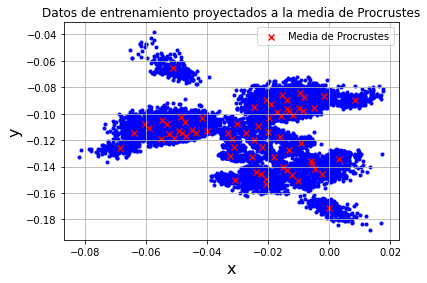

In [22]:
# Ahora vamos a alinear los landmarks en las particiones de entrenamiento y validación a la media de Procrustes

################ Datos de entrenamiento ####################

# Creamos una lista para guardar en ella los datos ajustados a la media de Procrustes.
training_media = []

# Este es el vector que vamos a ajustar a la media de Procrustes.
w_tr_comp = np.zeros((len(training[0]), 1), dtype=complex)

# Llenamos el vector complejo para poderlo usar para ajustarlo a la media de Procrustes.
for i in range(len(training)):
    dato = training[i]
    for j in range(len(dato)):
        w_tr_comp[j] = complex(dato[j][0], dato[j][1])

    # Se hace el ajuste y se añade el dato ajustado a la lista de datos de entrenamiento ajustados a la media de Procrustes.
    wp_tr = w_tr_comp*((np.transpose(np.conj(w_tr_comp))@mediaProc)/((np.transpose(np.conj(w_tr_comp))@w_tr_comp)))
    training_media.append(wp_tr)

    # Separamos las coordenadas X y las coordenadas Y
    wp_tr_r = wp_tr.real
    wp_tr_i = wp_tr.imag

    # Gráfica de los datos
    plt.scatter(wp_tr_i, -wp_tr_r, color='blue', marker='.')

# Se grafica la media de Procrustes junto con los datos ajustados.
plt.grid()
plt.scatter(coordsY, -coordsX, color='red', marker='x', label='Media de Procrustes')
plt.title('Datos de entrenamiento proyectados a la media de Procrustes')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


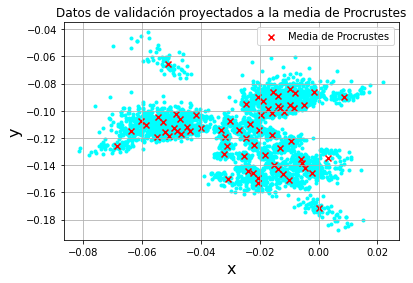

In [23]:
################# Datos de validación ##################

# Creamos una lista global de datos de validación
validation = [validation1, validation0]
validation = list(itertools.chain.from_iterable(validation))

# Creamos una lista para guardar en ella los datos ajustados a la media de Procrustes.
validation_media = []

# Este es el vector que vamos a ajustar a la media de Procrustes.
w_val_comp = np.zeros((len(validation[0]), 1), dtype=complex)

# Llenamos el vector complejo para poderlo usar para ajustarlo a la media de Procrustes.
for i in range(len(validation)):
    dato = validation[i]
    for j in range(len(dato)):
        w_val_comp[j] = complex(dato[j][0], dato[j][1])

    # Se hace el ajuste y se añade el dato ajustado a la lista de datos de validación ajustados a la media de Procrustes.
    wp_val = w_val_comp*((np.transpose(np.conj(w_val_comp))@mediaProc)/((np.transpose(np.conj(w_val_comp))@w_val_comp)))
    validation_media.append(wp_val)

    # Separamos las coordenadas X y las coordenadas Y
    wp_val_r = wp_val.real
    wp_val_i = wp_val.imag

    # Gráfica
    plt.scatter(wp_val_i, -wp_val_r, color='cyan', marker='.')

# Se grafica la media de Procrustes junto con los datos ajustados.
plt.grid()
plt.scatter(coordsY, -coordsX, color='red', marker='x', label='Media de Procrustes')
plt.title('Datos de validación proyectados a la media de Procrustes')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()
plt.savefig('landmarks_val_mediaProc.eps')

# d) Con los landmarks alineados, cree un vector de características de tamaño 134 por cada imagen de entrenamiento y validación.

La primera característica corresponde a la componente horizontal del landmark 1, y la segunda característica corresponde a las componente vertical del landmark 1 de la expresión facial. Repita este procedimiento para el resto de los landmarks.


### Datos de entrenamiento

In [15]:
# Dentro de los datos de entrenamiento (training), los primeros 137 corresponden a clase 1 y los siguientes 137 corresponden a clase 0.
cClase1_tr = 137
cClase0_tr = cClase1_tr + 137

numClase1_tr = cClase1_tr
numClase0_tr = cClase0_tr - cClase1_tr

# Se crean 2 matrices de tamaño (2n = 134)x(numDatos_clase): uno para cada clase, de tamaño numClase1_tr y numClase0_tr respectivamente.
mClase1_train = np.zeros((2*len(training_media[0]), numClase1_tr))
mClase0_train = np.zeros((2*len(training_media[0]), numClase0_tr))

# Recorremos la cantidad de datos de entrenamiento que tengamos (en este caso tenemos 137*2 = 274) y vamos preguntando en qué rango de datos nos encontramos con ayuda de los contadores creados arriba. Dependiendo del rango se sabe en qué clase nos encontramos. Vamos llenando el vector correspondiente a cada clase con las coordsX (parte real) y coordsY (parte imaginaria).
for i in range(len(training_media)):
    dato = training_media[i]
    datoNew = np.zeros((2*len(dato), 1))
    for j in range(len(dato)):
        datoNew[j*2] = dato.real[j]
        datoNew[j*2+1] = dato.imag[j]
    if i < cClase1_tr:
        mClase1_train[:,i] = columna(datoNew)
    elif i >= cClase1_tr and i < cClase0_tr:
        k = i - cClase1_tr
        mClase0_train[:,k] = columna(datoNew)

### Datos de validación

In [16]:
# Dentro de los datos de validación (validation), los primeros 34 corresponden a clase 1 y los siguientes 34 corresponden a clase 0.
cClase1_val = 34
cClase0_val = cClase1_val + 34

numClase1_val = cClase1_val
numClase0_val = cClase0_val - cClase1_val

# Se crean 2 matrices de tamaño (2n = 134)x(numDatos_clase): uno para cada clase, de tamaño numClase1_val y numClase0_val respectivamente.
mClase1_val = np.zeros((2*len(validation_media[0]), numClase1_val))
mClase0_val = np.zeros((2*len(validation_media[0]), numClase0_val))

# Recorremos la cantidad de datos de validación que tengamos (en este caso tenemos 34*2 = 68) y vamos preguntando en qué rango de datos nos encontramos con ayuda de los contadores creados arriba. Dependiendo del rango se sabe en qué clase nos encontramos. Vamos llenando el vector correspondiente a cada clase con las coordsX (parte real) y coordsY (parte imaginaria).
for i in range(len(validation_media)):
    dato = validation_media[i]
    datoNew = np.zeros((2*len(dato), 1))
    for j in range(len(dato)):
        datoNew[j*2] = dato.real[j]
        datoNew[j*2+1] = dato.imag[j]
    if i < cClase1_val:
        mClase1_val[:,i] = np.array(np.matrix(datoNew)).T
    elif i >= cClase1_val and i < cClase0_val:
        k = i - cClase1_val
        mClase0_val[:,k] = np.array(np.matrix(datoNew)).T

# e) Identifique los índices de las características (134 en total)  que están asociadas a: ojo izquierdo, ojo derecho, ceja izquierda, ceja derecha, boca, nariz, y contorno de la cara.

In [17]:
# Creamos listas para guardar los índices donde se encuentran los landmarks asociados a cada parte de la cara.

# Estos índices se determinaron graficando la media de Procrustes (puede ser cualquier cara, really) paso por paso, cambiando los límites del range del for de aquí abajo para mirar qué parte de la cara se graficaba primero.

# for i in range(63,67):
#     plt.xlim([-0.07, 0.01])
#     plt.ylim([-0.18, -0.06])
#     plt.scatter(coordsY[i], -coordsX[i], marker='x', color='red')
#     plt.grid(b=True)

# Por la forma en que están organizados nuestros vectores de características (las columnas de las matrices mClasex_train, mClasex_val), el índice par nos indica la coordX y ese índice+1 nos daría su correspondiente coordY.

right_eye = np.arange(2*0,2*9, 2)
right_brow = np.arange(2*18,2*26, 2)
left_eye = np.arange(2*9,2*18, 2)
left_brow = np.arange(2*26,2*34, 2)
nose = np.arange(2*34,2*49, 2)
mouth = np.arange(2*49, 2*63, 2)
face = np.arange(2*63,2*67, 2)

print(f'\nTotal de par de coordenadas: {len(left_eye)+len(right_eye)+len(left_brow)+len(right_brow)+len(nose)+len(mouth)+len(face)}\n')


Total de par de coordenadas: 67



# f) Clasificación a través de regresión logística

Implemente una rutina que, con los datos de entrenamiento, aprenda un un clasificador lineal que discrimine las expresiones de felicidad del resto de las emociones (clase 1 y clase 0). No pueden utilizar funciones preestablecidas para aprender un modelo de regresión logística, pero si pueden utilizar un toolbox de optimización para resolver la minimización de la entropía cruzada. Usted, a mano, tiene que definir la función objetivo a minimizar. Sea $w_h = [w_0, w_{h1}, w_{h2}, ..., w_{h134}]^T$ el vector que define el clasificador lineal estimado. Recuerde que cada elemento de $w_h$ está asociado a una característica (excepto $w_0$, que es el bias), indicando la relevancia de la característica en la clasificación.

In [18]:
# Definición de la función de la regresión logísitca.
# Recibe un vector fila de parámetros w y un vector columna de valores x, retorna la función logística evaluada en esos valores.
def log_reg(w, x):
    return float(1/(1 + np.exp(w@x)))

# Tenemos que crear una matriz de vectores de características global que combine los datos de entrenamiento de ambas clases:
mCarac = np.concatenate((mClase1_train, mClase0_train), axis=1)

# Creamos una matriz mCarac auxiliar que incluye una fila de 1s al final, para tener en cuenta el término de bias.
unos = np.ones((1, np.shape(mCarac)[1]))
mCarac_aux = np.vstack((mCarac, unos))

# Se crea una lista de etiquetas que se llenará con 1 o 0 dependiendo si los datos en ciertos rangos son de lase 1 o clase 0.
t_train = []
for i in range(len(training)):
    if i < 137:
        t_train.append(1)
    else: 
        t_train.append(0)

# Definición de la función de entropía cruzada para los datos de etrenamiento, usada para encontrar el valor de los parámetros w y luego poder usar la regla MAP para construir el clasificador.
# Recibe un vector w0 de parámetros del tamaño de los vectores de características que conforman la matriz mCarac_aux + 1. En esta posición adicional del vector se guarda el parámetro de regularización lambda.  Si los vectores de características son de 134x1, el vector w0 que entra por parámetro debe ser de 135x1, pues incluye el parámetro lambda de regularización en la última posición del mismo. 
def entrop_cruz_train(w0):
    suma = 0
    # Se crea una lista donde se guardarán los diferentes valores de y[i]. 
    y = []
    l = float(w0[-1]) # Se define el parámetro lambda como el valor de la última posición del vector de entrada.
    # Se crea un nuevo vector de parámetros w, que es el mismo vector de entrada pero removiéndole el último elemento, para que quede de la       misma dimensión que los vectores de características y poder realizar las operaciones matriciales. 
    w = w0[:-1] 
    
    # Se llena el vector con sus respectivas y[i]
    for i in range(np.shape(mCarac_aux)[1]):
        y.append(log_reg(w, columna(mCarac_aux[:,i])))

    # Se aplica la fórmula de la función de entropía cruzada con la matriz de características correspondiente a los datos de entrenamiento.
    for i in range(np.shape(mCarac_aux)[1]):
        suma = suma + t_train[i]*np.log(y[i]) + (1-t_train[i])*np.log(1-y[i])
    
    # Se retorna el valor multiplicado por -1 y sumándole el término de regularización.
    return -1*suma + l*(np.linalg.norm(w))**2

# Con estas líneas se realizó el entrenamiento.
# l = 100
# w2 = np.zeros((1, 136))
# peso = 1/134
# for i in range(len(w2)):
#     w2[i] = peso
# w2[:,np.shape(w2)[1]-1] = l

# res = minimize(entrop_cruz_train, w2)
# print(res.fun)
# print(columna(res.x))

#####################################################################################################################################

# Ahora se hace lo mismo, pero usando la matriz de caracterísitcas correspondiente de los datos de validación, que es con la que se probará el mejor parámetro lambda a utilizar.

# Creamos una lista t donde guardaremos un 1 o un 0 dependiendo de si el dato en t[i] es clase 1 o 0 (correspondientemente).
t = []

# Recordamos que los primeros 34 datos dentro de la lista de datos de validación corresponden a clase 1 y los siguientes 34 corresponden a clase 0.
for i in range(len(validation)):
    if i < 34:
        t.append(1)
    else: 
        t.append(0)

# Tenemos que crear una matriz de vectores de características global que combine los datos de validación de ambas clases:
mCarac1 = np.concatenate((mClase1_val, mClase0_val), axis=1)

# Creamos una matriz mCarac1 auxiliar que incluye una fila de 1s al final, para tener en cuenta el término de bias, pues la función de entropía cruzada se va a probar con los datos de validación.
unos = np.ones((1, np.shape(mCarac1)[1]))
mCarac1_aux = np.vstack((mCarac1, unos))

# Definición de la función de entropía cruzada para los datos de etrenamiento, usada para encontrar el valor de los parámetros w y luego poder usar la regla MAP para construir el clasificador.
# Recibe un vector w0 de parámetros del tamaño de los vectores de características que conforman la matriz mCarac_aux + 1. En esta posición adicional del vector se guarda el parámetro de regularización lambda.  Si los vectores de características son de 134x1, el vector w0 que entra por parámetro debe ser de 135x1, pues incluye el parámetro lambda de regularización en la última posición del mismo.
def entrop_cruz(w0):
    suma = 0
    # Se crea una lista donde se guardarán los diferentes valores de y[i]. 
    y = []
    l = float(w0[-1]) # Se define el parámetro lambda como el valor de la última posición del vector de entrada.
    # Se crea un nuevo vector de parámetros w, que es el mismo vector de entrada pero removiéndole el último elemento, para que quede de la       misma dimensión que los vectores de características y poder realizar las operaciones matriciales.
    w = w0[:-1]

    # Se llena el vector con sus respectivas y[i]
    for i in range(np.shape(mCarac1_aux)[1]):
        y.append(log_reg(w, columna(mCarac1_aux[:,i])))

    # Se aplica la fórmula de la función de entropía cruzada con la matriz de características correspondiente a los datos de entrenamiento.
    for i in range(np.shape(mCarac1_aux)[1]):
        suma = suma + t[i]*np.log(y[i]) + (1-t[i])*np.log(1-y[i])
        
    # Se retorna el valor multiplicado por -1 y sumándole el término de regularización.
    return -1*suma + l*(np.linalg.norm(w))**2

# g) Error de clasificación

Con la rutina del enunciado f), calcule el error de clasificación sobre el conjunto de validación para al menos 10 valores de λ > 0. Grafique una curva con los valores de error versus λ. Analice los resultados obtenidos, e identifique el valor de λ que produce menor error de clasificación en el conjunto de validación.


lambda: 0.005
errores_clase1: 0
errores_clase0: 17


lambda: 0.006
errores_clase1: 0
errores_clase0: 17


lambda: 0.007
errores_clase1: 0
errores_clase0: 17


lambda: 0.008
errores_clase1: 0
errores_clase0: 17


lambda: 0.009000000000000001
errores_clase1: 0
errores_clase0: 17


lambda: 0.01
errores_clase1: 0
errores_clase0: 17


lambda: 0.011
errores_clase1: 0
errores_clase0: 17


lambda: 0.012
errores_clase1: 0
errores_clase0: 17


lambda: 0.013000000000000001
errores_clase1: 0
errores_clase0: 17


lambda: 0.014
errores_clase1: 0
errores_clase0: 17


lambda: 0.015
errores_clase1: 0
errores_clase0: 17


lambda: 0.016
errores_clase1: 0
errores_clase0: 17


lambda: 0.017
errores_clase1: 0
errores_clase0: 17


lambda: 0.018000000000000002
errores_clase1: 0
errores_clase0: 17


lambda: 0.019
errores_clase1: 0
errores_clase0: 17


lambda: 0.02
errores_clase1: 0
errores_clase0: 17



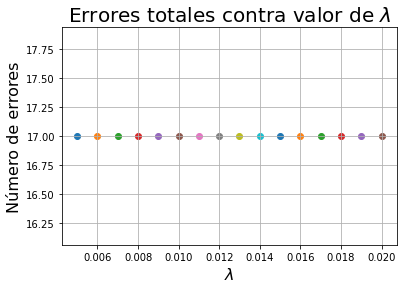

In [19]:
# Creamos dos contadores que nos indican si nos encotnramos en la clase 1 o en la clase 0.
cClase1_val = 34
cClase0_val = cClase1_val + 34

val = 0.001
lambdas = []

for i in range(5, 21):
    lambdas.append((val*i))

# Contadores para clasificacioens correctas.
contador_clase1 = 0
contador_clase0 = 0

# Contadores para clasificaciones incorrectas. Nomenclatura: errores_clasecorrecta.
errores_clase1 = 0
errores_clase0 = 0

# Determinamos con qué valor de regularización se obtienen menos errores.
for l in lambdas:

    # Son 134 características, 1 más para el bias, otra más para el lambda. Esta es la condición inicial.
    w1 = np.zeros((1,136))
    # Pesos iguales
    peso = 1/134

    # Se inicializa el vector de parámetros con los mismos pesos para todas las características.
    for i in range(len(w1)):
        w1[i] = peso

    # Ponemos el parámetro de regularización en la última posición del vector de condición inicial de parámetros
    w1[:,np.shape(w1)[1]-1] = l

    # Se encuentra el vector de parámetros óptimo con el lambda de la iteración actual.
    res1 = minimize(entrop_cruz, w1, method='BFGS')
    w_opt = columna(res1.x[:-1])

    # Se realiza la clasificación usando la regla de decisión de la regresión logística.
    for i in range(np.shape(mCarac1_aux)[1]):
        # Si el dato es de clase 1
        if i < cClase1_val:
            if w_opt.T @ columna(mCarac1_aux[:,i]) < 0:
                contador_clase1 += 1 
            else:
                errores_clase1 += 1
        # Si el dato es de clase 0
        elif i >= cClase1_val and i < cClase0_val:
            if w_opt.T @ columna(mCarac1_aux[:,i]) > 0:
                contador_clase0 += 1
            else:
                errores_clase0 += 1
    
    errores_totales = errores_clase1 + errores_clase0
    
    # Para cada lambda se imprime la cantidad de errores que el clasificador cometió.
    print(f'\nlambda: {l}')
    print(f'errores_clase1: {errores_clase1}')
    print(f'errores_clase0: {errores_clase0}\n')

    # Se grafica el error de la iteración actual con su respectivo valor de lambda.
    plt.scatter(l, errores_totales)
    plt.grid(b=True)
    plt.title('Errores totales contra valor de $\lambda$', fontsize=20)
    plt.xlabel('$\lambda$', fontsize=16)
    plt.ylabel('Número de errores', fontsize=16)

    # Se reinician los contadores para volver a graficar con el siguiente lambda.
    errores_clase1 = 0
    errores_clase0 = 0
    errores_totales = 0
    contador_clase1 = 0
    contador_clase0 = 0


# h) Matriz de confusión con los datos de validación

Con el valor de λ seleccionado en el enunciado g), calcule la matriz de confusión en los datos de validación. Comente los resultados obtenidos

In [20]:
# Lambda elegido
l = 0.019

# Contadores para clasificacioens correctas
contador_clase1 = 0
contador_clase0 = 0

# Nomenclatura: errores_clasecorrecta
errores_clase1 = 0
errores_clase0 = 0

# Esta es la condición inicial.
w1 = np.zeros((1,136))

# Ponemos el parámetro de regularización en la última posición del vector de condición inicial de parámetros
w1[:,np.shape(w1)[1]-1] = l

# Se encuentra el vector de parámetros óptimo
res1 = minimize(entrop_cruz, w1, method='BFGS')
w_opt = columna(res1.x[:-1])

# Se realiza la clasificación
for i in range(np.shape(mCarac1_aux)[1]):
    # Si es de clase 1.
    if i < cClase1_val:
        if w_opt.T @ columna(mCarac1_aux[:,i]) < 0:
            contador_clase1 += 1 
        else:
            errores_clase1 += 1
    # Si es de clase 0.
    elif i >= cClase1_val and i < cClase0_val:
        if w_opt.T @ columna(mCarac1_aux[:,i]) > 0:
            contador_clase0 += 1
        else:
            errores_clase0 += 1

# Se calculan los errores totales en cantidad y porcentaje.
errores_totales = errores_clase1 + errores_clase0
error_val = errores_totales/np.shape(mCarac1_aux)[1]

# Porcentaje de error al clasificar por clase. Nomenclatura: e_clase
e_clase1 = errores_clase1/np.shape(mClase1_val)[1]
e_clase0 = errores_clase0/np.shape(mClase0_val)[1]

# Clasificaciones correctas
correctas = contador_clase1 + contador_clase0
porcentaje_correctas = correctas/np.shape(mCarac1_aux)[1]

print(f'Num. de clasificaciones correctas: {correctas}')
print(f'Porcentaje de clasificaciones correctas (datos de validación): {np.round(porcentaje_correctas, 4)*100}%\n')

print(f'Errores de clasificación de la clase 1: {errores_clase1}')
print(f'Errores de clasificación de la clase 0: {errores_clase0}')
print(f'Num. total de errores: {errores_totales}')
print(f'Porcentaje de error (datos de validación): {np.round(error_val, 4)*100}% \n')

# Se crea la matriz de confusión y se imprime como un dataframe. 
confusion = np.array([[contador_clase1, errores_clase1], [errores_clase0, contador_clase0]])
df = pd.DataFrame(confusion, columns=['Clase 1', 'Clase 0'], index=['Clase 1', 'Clase 0'])

print(f'Matriz de confusión: \n {df} \n')
print(f'Porcentaje de error Clase 1: {errores_clase1}/{np.shape(mClase1_val)[1]} = {np.round(e_clase1, 4)*100}%\n')
print(f'Porcentaje de error Clase 0: {errores_clase0}/{np.shape(mClase0_val)[1]} = {np.round(e_clase0, 4)*100}%\n')

Num. de clasificaciones correctas: 55
Porcentaje de clasificaciones correctas (datos de validación): 80.88%

Errores de clasificación de la clase 1: 0
Errores de clasificación de la clase 0: 13
Num. total de errores: 13
Porcentaje de error (datos de prueba): 19.12% 

Matriz de confusión: 
          Clase 1  Clase 0
Clase 1       34        0
Clase 0       13       21 

Porcentaje de error Clase 1: 0/34 = 0.0%

Porcentaje de error Clase 0: 13/34 = 38.24%



# i) Gráfica de barras

Utilizando una sola gráfica de barras, grafique cada pareja ($j$, $|w_{hj}|$) (es decir, el eje horizontal de la gráfica es el índice de la característica y el eje vertical es la magnitud del elemento del vector), j = 1, . . . , 134. Identifique en la gráfica las componentes de la cara a las que pertenece cada característica. Comente los resultados obtenidos e interprete el clasificador encontrado por el proceso de aprendizaje automático.

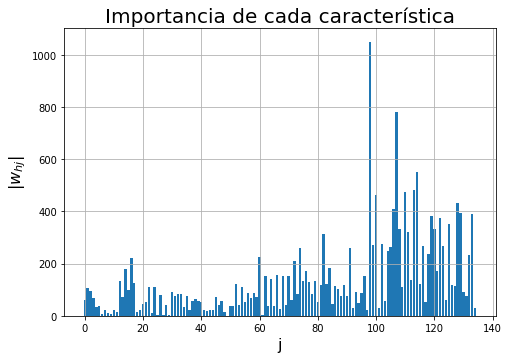


Índices de la ceja derecha: [36 38 40 42 44 46 48 50]

Índices de la ceja izquierda: [52 54 56 58 60 62 64 66]

Índices del ojo derecho: [ 0  2  4  6  8 10 12 14 16]

Índices del ojo izquierdo: [18 20 22 24 26 28 30 32 34]

Índices de la nariz: [68 70 72 74 76 78 80 82 84 86 88 90 92 94 96]

Índices de la boca: [ 98 100 102 104 106 108 110 112 114 116 118 120 122 124]

Índices del contorno de la cara: [126 128 130 132]



In [25]:
# Se crean listas para los datos del eje horizontal y vertical respectviamente.
jotas = []
mags = []
for i in range(len(w_opt)):
    jotas.append(i)
    mags.append(np.abs(float(w_opt[i])))

# Se construye la gráfica con las listas creadas arriba.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(jotas, mags)
plt.grid()
plt.title('Importancia de cada característica', fontsize=20)
plt.xlabel('j', fontsize=16)
plt.ylabel('$|w_{hj}|$', fontsize=16)
plt.savefig('barras.eps')
plt.show()


# Se imprimen los índices dónde se encuentra cada característica para poder comparar con los resultados obtenidos en la gráfica de barras. 
print(f'\nÍndices de la ceja derecha: {right_brow}\n')
print(f'Índices de la ceja izquierda: {left_brow}\n')
print(f'Índices del ojo derecho: {right_eye}\n')
print(f'Índices del ojo izquierdo: {left_eye}\n')
print(f'Índices de la nariz: {nose}\n')
print(f'Índices de la boca: {mouth}\n')
print(f'Índices del contorno de la cara: {face}\n')

Es claro que los índices de mayor importancia para decidir si la expresión facial es clase 1 o clase 0 son los índices relacionados con la boca, pues en la gráfica se puede notar una magnitud de los parámetros del hiperplano de clasificación mucho más alta alrededor de estos índices en comparación con el resto. Los siguientes índices más importantes corresponden a los de la ceja izquierda y la nariz. Los índices menos importantes corresponden a los de los ojos.